In [1]:
from IPython.display import Image, display, HTML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.preprocessing import normalize
from matplotlib import interactive

# Helium Neon Laser Lab 

William Kemp

James Park

## Session 2

### Purpose:  

The purpose of this session is to collect data of the wavelength of transmitted photon from the HeNe laser



## Calbiration of Monochrometer

 
Before we can collect the data on the nomial wavelengths of HeNe laser, we need to be able to convert the knob value of monochrometer (measured in inches) to the wavelengths of the transmitted photons from the output slit. In other words, we need to develop a relationship between the knob and the wavelengths.

To do this:  
- Place the mercury lamp such that the light is aimed at the input slit of the monochrometer. Place the PMT in the output slit of the monochometer.
- Turn on the mercury lamp, rotate the knob. Record the knob value when you notice a signal from the oscilloscope
- The voltage signal from the oscilloscope is proportional to the intensity of transmitted photons from the mercury lamp. 
- Remove the PMT and rotate the knob until a green light is visible from the monochometer's output slit. Note which knob value produces this green light. 

Our measures knob value at 0.6014 inches produced a visible green light.


The HeNe lab manual appendix from Canvas has a list of nomial wavelengths of Mercury and Argon. Since the green light has a range of 520 nm - 560 nm, we can conclude that a transmitted photon with wavelength 546.074 nm (one of Mercury's wavelength) is produced when the monochrometer's knob is at 0.6014 inches. Furthermore, we were told that knob and the output wavelength have a linear relationship and using this information, all knob values below or above  0.6014 inches correspond to wavelength below or above 546.074 nm respectively.


## Data Anaylsis of Monochrometer's Calibration

The uncertainty of the knob is ± 0.0001 inches and this implies that the uncertainty ranges from 0.01% to 0.02% in our collected data. Because the uncertainty is insignficant, it is reasonable to disregard it during our data analayis.

We applied linear regression (using the scipy library) in our collected data below and provided the desired relationship. 

In [2]:
# Data initialization 

calibrationdata = pd.read_csv('s2_data/calibration.csv')
wavelengthOriginal = calibrationdata[calibrationdata.columns[0]] #nm
measurementsOriginal = np.absolute(calibrationdata[calibrationdata.columns[1]]) #inches


In [3]:
column1 = 'Knob Measurement (±0.0001 inches)'
column2 = 'Wavelength (nm)'

dataToDisplay =  {
    column1 : measurementsOriginal.values,
    column2 : wavelengthOriginal.values
}
display(HTML("Tabular Summary of the Calibration Data"))
df = pd.DataFrame(dataToDisplay, columns=[column1, column2]).to_html(index=False)
display(HTML(df))

Knob Measurement (±0.0001 inches),Wavelength (nm)
0.7751,579.066
0.6339,576.960
0.6014,546.074
0.5180,435.833
0.4589,404.656
0.4212,365.015
0.0550,334.148


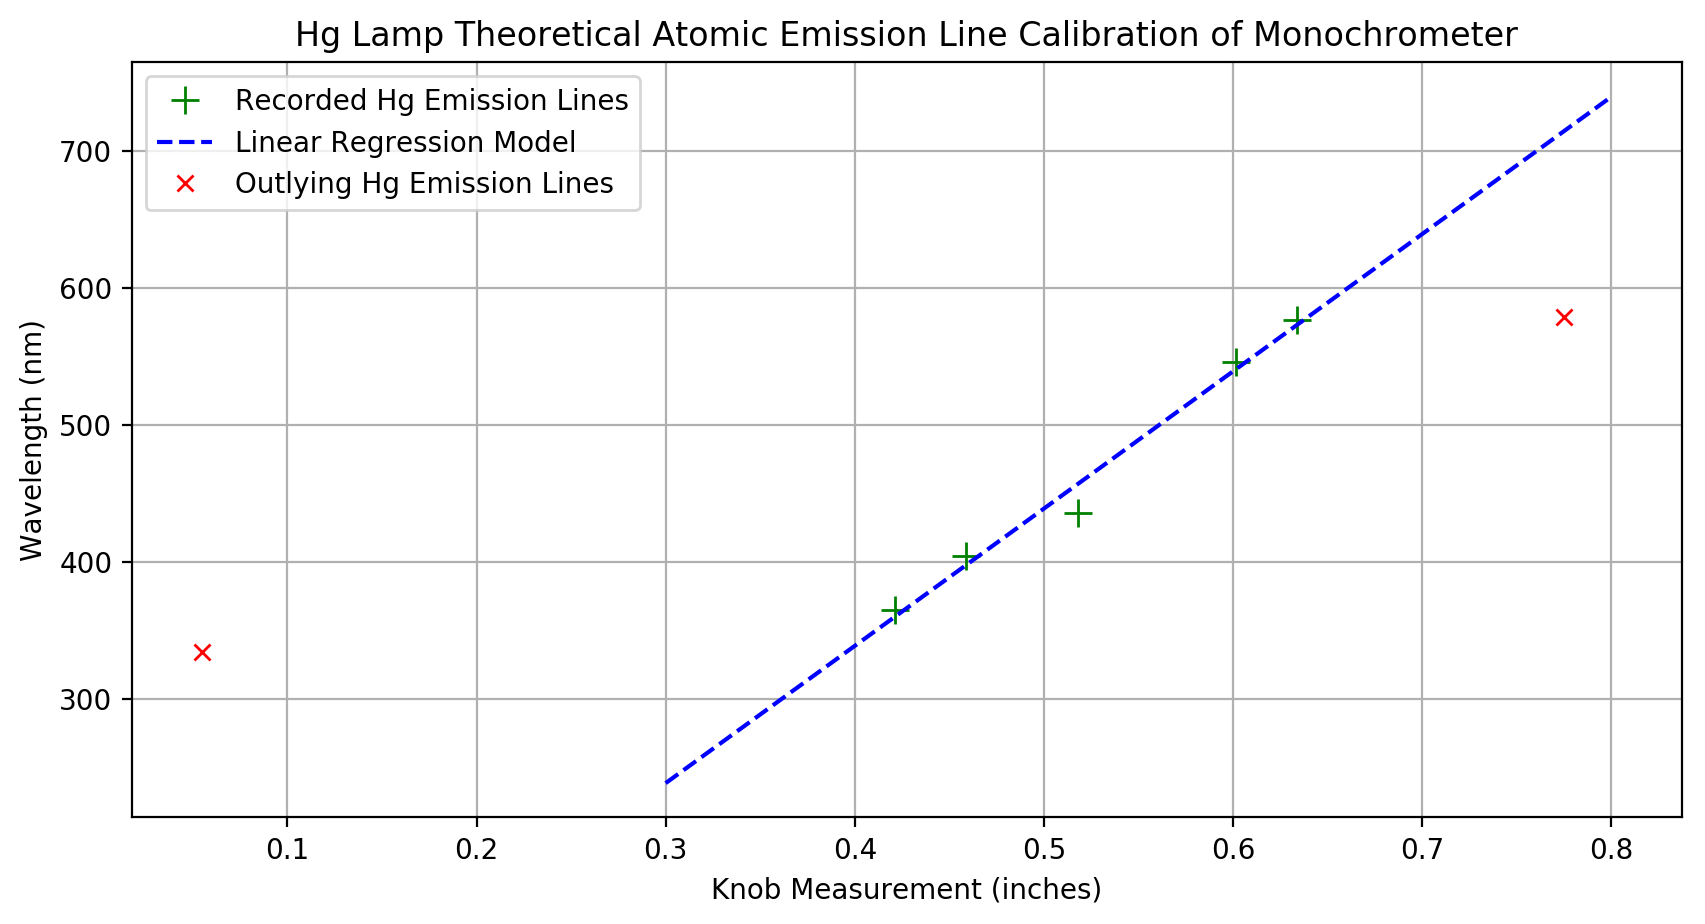

In [15]:
# outliered data

x_out = np.array([measurementsOriginal[0], measurementsOriginal[measurementsOriginal.size-1]])
y_out =  np.array([wavelengthOriginal[0], wavelengthOriginal[wavelengthOriginal.size-1]])

# This data contains removed outliers
wavelength = wavelengthOriginal[1:] #nm
wavelength = wavelength[:-1]

measurements = measurementsOriginal[1:] #nm
measurements = measurements[:-1]

slope, intercept, rvalue, _, stderr = stats.linregress(measurements,wavelength)

R_squared = rvalue**2
display(HTML("Relationship between knob value ($X_{inches}$) and wavelength ($\lambda$): $\lambda$= (%0.01f ± %0.1f)* $X_{inches}$ + %0.05f nm, \n" % (slope, stderr ,intercept)))
display(HTML("Since the $R$ Squared value is  %0.02f%%, we can confidently say that the knob and the output wavelenght have a good linear relationship. " % (R_squared*100)))

x = np.linspace(0.30, 0.8, 1000)
y_predicted = slope*x + intercept

plt.figure(figsize=(10, 5), dpi= 200)
plt.plot(measurements,wavelength, "+g",markersize = 10, label="Recorded Hg Emission Lines")
plt.plot(x, y_predicted, "--b", label="Linear Regression Model")

plt.plot(x_out, y_out, "xr", label="Outlying Hg Emission Lines")

plt.xlabel("Knob Measurement (inches)")
plt.ylabel("Wavelength (nm)")
plt.grid()
plt.title("Hg Lamp Theoretical Atomic Emission Line Calibration of Monochrometer")
plt.legend()
plt.show()

The justification of removing the first and last data is to produce a more linear relationship between the knob measurement and the wavelengths.

We cross-referenced this established model from the file *hg_calibration*, which was provided to us from Dr.Halpern on Canvas. We also included this file in this repo and it can be found under the folder *Relevant Papers*.

According to the file *hg_calibration*, the relationship between knob and wavelength is  $\lambda$ = 1.0042 $X_{M}$ -56.77 nm. The unit of the knob measurement, $X_{M}$ , is every 0.001 inches, so if we convert it to inches, then the relationship is $\lambda$ = 1004.2 $X_{inches}$ -56.77 nm which looks very close to the relationship that we obtained above.

## Collected Data of Atomic Lines of HeNe Laser


Since we can determine the output wavelength slit from monochromator from the knob, we can record the wavelengths produced from the emissions from the HeNe.

We rotate the knob until we observe a signal on the oscilloscope. The signal (in mV) represents the intensity of the transmitted photon






In [5]:
experimental_data = pd.read_csv('s2_data/HeNe_data1.csv')
experimental_data = experimental_data.sort_values(by=[experimental_data.columns[0]])

measusredKnob = experimental_data[experimental_data.columns[0]] # inches
meanVolt = np.absolute(experimental_data[experimental_data.columns[1]]) # voltage 
meanVoltUncertainty = np.absolute(experimental_data[experimental_data.columns[2]]) # voltage uncertainty
wavelengthFromKnob = slope*measusredKnob + intercept   #nm 

column1 = 'Knob Measurement (inches)'
column2 = 'Converted Wavelength(nm)' 
column3 = 'Mean Voltage (mV)'
column4 = 'Mean Voltage Uncertainty (mV)'

dataToDisplay =  {
    column1 : measusredKnob.values,
    column2 : wavelengthFromKnob.values,
    column3 : meanVolt.values,
    column4 :  meanVoltUncertainty.values   
}

display(HTML("Tabular Summary of the Votage Data"))
df = pd.DataFrame(dataToDisplay, columns=[column1, column2, column3 , column4]).to_html(index=False)
display(HTML(df))

Knob Measurement (inches),Converted Wavelength(nm),Mean Voltage (mV),Mean Voltage Uncertainty (mV)
0.4453,384.136504,1770.0,10.0
0.5028,441.771525,1220.0,10.0
0.5269,465.928117,460.0,1.0
0.5486,487.679072,431.0,1.0
0.5557,494.795745,1490.0,10.0
0.5902,529.376757,240.0,3.0
0.6310,570.272563,494.0,3.0
0.6377,576.988296,275.0,1.0
0.6420,581.298394,1310.0,10.0
0.6439,583.202855,1480.0,1.0


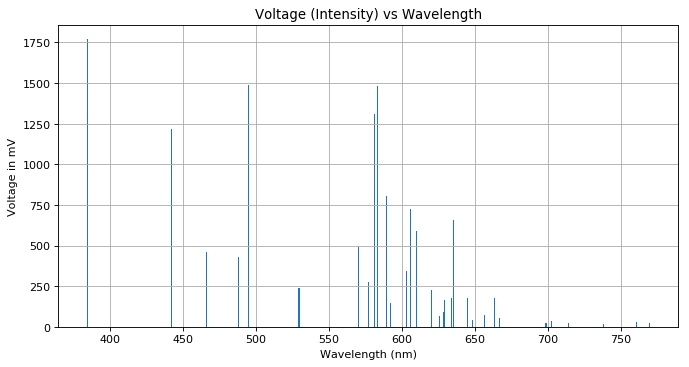

In [6]:
plt.figure(figsize=(10, 5), dpi= 80);plt.bar(wavelengthFromKnob, meanVolt)
plt.xlabel("Wavelength (nm)");plt.ylabel("Voltage in mV")
plt.title("Voltage (Intensity) vs Wavelength");plt.grid();plt.show()

Now we need to compare our experimental data of atomic spectrum from the theortical values of atomic spectrum. We have obtained the theortical values from the following website: http://www.pa.uky.edu/~peter/atomic/index.html. 

Using the website, we can query the atomic transitions of a requested element with a range of wavelengths. Our requested elements will be Neon-I and Helium-I; the "I" indicates that the elements are not ionized. The most important features that we care about in the output of the query are:
- the wavelength of the atomic transitions
- the transitional probablity ($A_{ki}$).
- the configuration, which tells us the jump between the energy levels 
   - e.g 5s to 3p

According to a paper by S.Inatsugu and J.R. Holmes, the transition probability and intensity of the atomic transition are linearly propertional. A soft copy of this paper (dubbed *PhysRevA.8.1678(1).pdf*) is under the *Relevant Papers*

We scanned through the query request of each He I and Ne I and pick the wavelengths that are the closest to our measured wavelengths and then using the configuration to determine if the energy level jump is possible or not.

The configuration has a higher priority than the wavelength when selecting the theortical wavelength from the output of the query. For example if there were two or more potential wavelenghts that match our measured wavelength, we picked the wavelength that had correct energy level jump, which is either 5s to 3p or 3p to 3s for Neon atom. We weren't sure what the correct energy level jump was for Helium atom, but it didn't really matter because there were only two atomic spectral lines that correspond to Helium.

Some of the Neons have no recorded transition probabilities, so we arbritarly set them to zero.

In [7]:
comparing_data = pd.read_csv('s2_data/expectedSpectra.csv')

measuredWavelength = comparing_data[comparing_data.columns[1]] 
theorticalWavelength = comparing_data[comparing_data.columns[2]] 
probabilty = comparing_data[comparing_data.columns[3]]
element = comparing_data[comparing_data.columns[4]]
jump = comparing_data[comparing_data.columns[5]]
possible = comparing_data[comparing_data.columns[6]]

column1 = 'Measured Wavelength (nm)'
column2 = 'Theortical Wavelength (nm)'
column3 = 'Transition Probability'
column4 = 'Ne or He'
column5 = 'Energy Level Jump'
column6 = 'Possible? (N/Y)'

dataToDisplay =  {
    column1 : measuredWavelength.values,
    column2 : theorticalWavelength.values,
    column3 : probabilty.values,
    column4 : element.values,
    column5 : jump.values,
    column6 : possible.values
}

display(HTML("Tabular Summary of Best Effort Match with Theortical and Measured Wavelengths"))
df = pd.DataFrame(dataToDisplay, columns=[column1, column2 , column3, column4, column5, column6]).to_html(index=False)
display(HTML(df))

Measured Wavelength (nm),Theortical Wavelength (nm),Transition Probability,Ne or He,Energy Level Jump,Possible? (N/Y)
384.1365,383.91800,366000.0,He,2p <- 10s,?
441.7715,441.73090,0.0,Ne,3p <- 11s,N
465.9281,465.50120,0.0,Ne,3p <- 8s,N
487.6791,486.96250,0.0,Ne,3p <- 6d,N
494.7957,494.63672,0.0,Ne,3p <- 7s,N
529.3768,529.96632,0.0,Ne,3p <- 6s,N
570.2730,569.13949,1170000.0,Ne,3p <- 5s,Y
576.9883,577.19154,404000.0,Ne,3p <- 5d,N
581.2980,581.30181,737000.0,Ne,3p <- 4d,N
583.2028,583.05238,287000.0,Ne,3p <- 4d,N


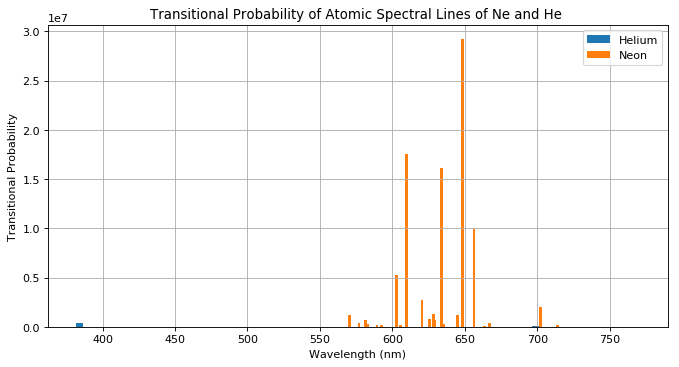

In [8]:
he_data = comparing_data[element == "He"]
ne_data = comparing_data[element == "Ne"]

he_wavelength = he_data[comparing_data.columns[1]]
he_probability = he_data[comparing_data.columns[3]]

ne_wavelength = ne_data[comparing_data.columns[1]]
ne_probability = ne_data[comparing_data.columns[3]]

plt.figure(figsize=(10, 5), dpi= 80)
plt.bar(he_wavelength, he_probability,width=5, label= "Helium");plt.bar(ne_wavelength, ne_probability,width=2, label= "Neon")
plt.title("Transitional Probability of Atomic Spectral Lines of Ne and He ")


plt.xlabel("Wavelength (nm)");plt.ylabel("Transitional Probability")
plt.grid();plt.legend();plt.show()

Let's compare the intensity from our measured wavelengths and the expected wavelengths.


The voltage of the signal and the transitional probability reveal information about the relative intensity of the transmitted photons. However, both of them are at different scales. 

The following is our best effort to standarize both sets of data in a single scale: 
- distinguish the transitional probability between Neon($A_{Ne}$) and Hellium($A_{He}$).
- normalize the data of voltage (V), transitional probability of Neon, and transitional probability of Helium.
    - i.e the normalized voltage will be $\frac{V}{\left\lVert V\right\rVert_{2}}$
    - i.e the normalized transitional probability of Ne will be $\frac{A_{Ne}}{\left\lVert A_{Ne}\right\rVert_{2}}$
    - i.e the normalized transitional probability of He will be $\frac{A_{He}}{\left\lVert A_{He}\right\rVert_{2}}$

- scale normalized transitional probability of Ne and normalized transitional probability of He as the same scale as the normalized voltage because max value of a normalizes voltage around 0.48. 
    - i.e $0.48 \frac{A_{Ne}}{\left\lVert A_{Ne}\right\rVert_{2}}$
    - i.e $0.48 \frac{A_{He}}{\left\lVert A_{He}\right\rVert_{2}}$

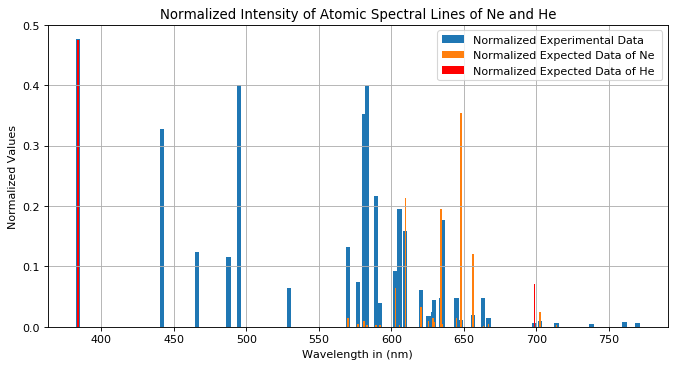

In [9]:
ne_normliazeIntensity  = 0.48*(ne_probability/np.linalg.norm(ne_probability))
he_normliazeIntensity  = 0.48*(he_probability/np.linalg.norm(he_probability))
normalizeVoltage = (meanVolt/np.linalg.norm(meanVolt))

plt.figure(figsize=(10, 5), dpi= 80)
plt.bar(wavelengthFromKnob, normalizeVoltage, width=3, label= "Normalized Experimental Data")
plt.bar(ne_wavelength, ne_normliazeIntensity, width=1, label= "Normalized Expected Data of Ne ")
plt.bar(he_wavelength, he_normliazeIntensity, width=1, color='red', label= "Normalized Expected Data of He")

plt.title("Normalized Intensity of Atomic Spectral Lines of Ne and He");
plt.xlabel("Wavelength in (nm)");plt.ylabel("Normalized Values")
plt.grid();plt.legend();plt.show()

It's more meaningful and relevant to filter our data (both experimental and theoretical) where the energy level jumps are possible for a HeNe laser; from 5s to 3p and from 3p to 3s.

Since there are only two atomic spectral lines for Helium, we will ignore them and it's reasonable to ignore Helium, but there will be mostly Neon for a HeNe laser.


C:\Users\kempw\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


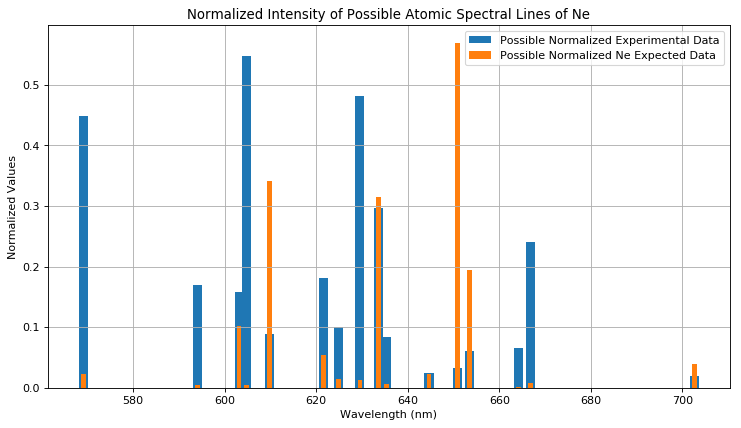

In [10]:
# just get the possible jumps

comparing_data_possiblejumps = comparing_data[ (possible == 'Y') & (element == 'Ne')]

c_theorticalWavelength = comparing_data_possiblejumps[comparing_data_possiblejumps.columns[2]] 
c_probabilty = comparing_data_possiblejumps[comparing_data_possiblejumps.columns[3]]
c_normliazeIntensity  = (c_probabilty/np.linalg.norm(c_probabilty))*0.77

experimental_data_possiblejumps = experimental_data.join(possible)[(possible == 'Y')]

e_voltage = np.absolute(experimental_data_possiblejumps[experimental_data.columns[1]])
e_normalizedIntensity = (e_voltage/np.linalg.norm(e_voltage))

normalizeVoltage = (meanVolt/np.linalg.norm(meanVolt))

plt.figure(figsize=(11, 6), dpi= 80)
plt.bar(c_theorticalWavelength, e_normalizedIntensity, width=2, label= "Possible Normalized Experimental Data")
plt.bar(c_theorticalWavelength, c_normliazeIntensity, width=1, label= "Possible Normalized Ne Expected Data")
plt.title("Normalized Intensity of Possible Atomic Spectral Lines of Ne");


plt.xlabel("Wavelength (nm)");plt.ylabel("Normalized Values")
plt.grid();plt.legend();plt.show()

Even if we just look at the possible atomic spectral lines, the experimental and the expected intensity values don't really match. However if we shift our experimental data to the right, some of the larger normalized intensity are sort of equal, but then shifing the intensity will misalign the wavelength values. Since our monochromator contributes an error 0f ±50nm, it's possible that the intensity values are misaligned